<i>**[Beginner][Tutorial] Intel Image Classification**

In this kernel, i will show you how to build the basic model in Tensorflow Keras. First of all i will use Convolutional Neural Network (CNN) in this kernel to predict upto 6 class labels.

First, import the important libraries.

In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import zipfile

C:\Users\Mr. Capable\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mr. Capable\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Mr. Capable\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): # main Directory where each class label is present as folder name.
        if labels == 'glacier': 
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [3]:
with zipfile.ZipFile('archive (4).zip', 'r') as zip_ref:
    zip_ref.extractall('adrian')

In [4]:
Images, Labels = get_images('./adrian/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

Lets find shape of our traing data.

As you see, The Training data is in shape of (Number of Training Images, Width of image, Height of image, Channel of image). This shape is very important. If you didnot resize the images to same size. It should be (No. of images,) shape. So, using this shape you cant feed the images to the model.

In [5]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


Let us look some random images of our dataset.

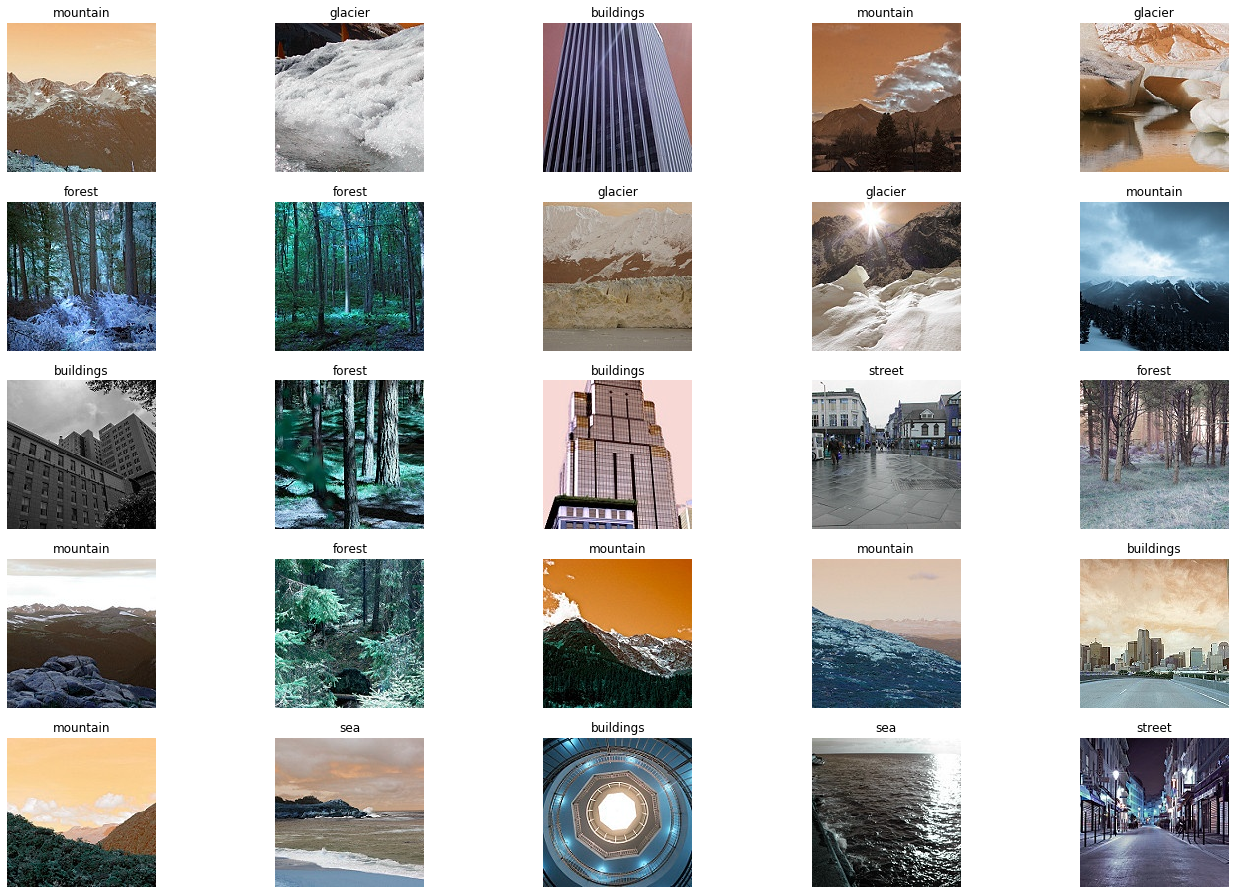

In [6]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

Now, Create the CNN model to predict the class labels.This is the basic CNN model.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 50)       

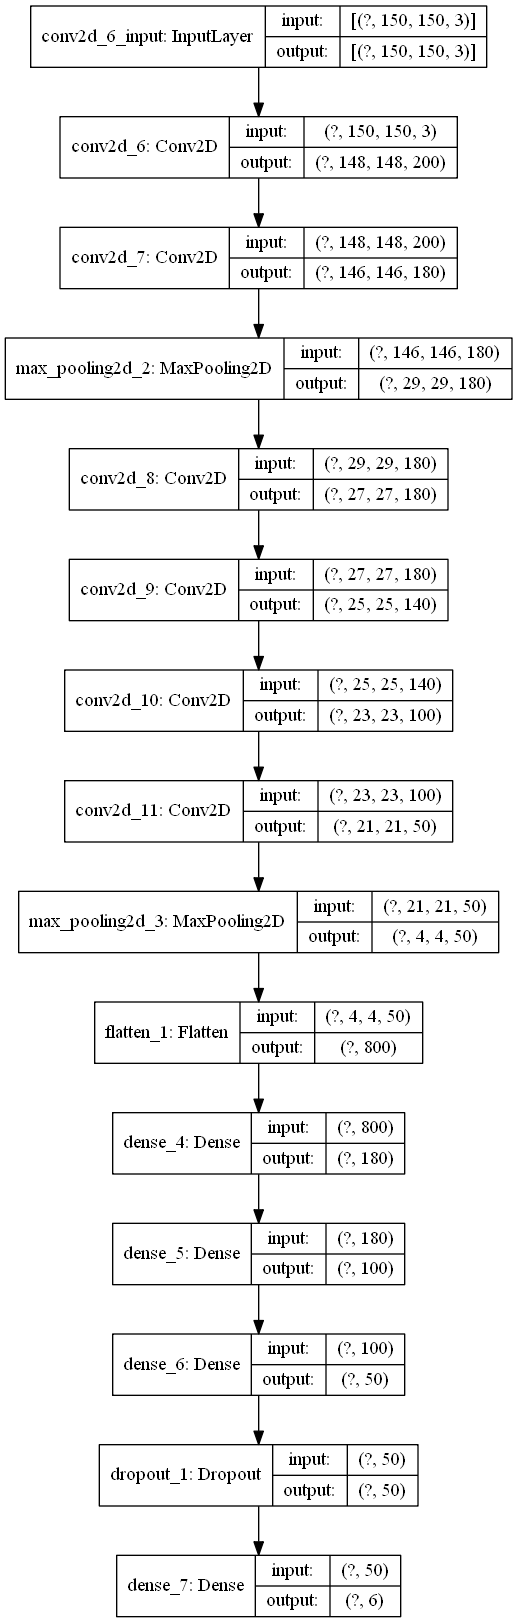

In [8]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

Now, lets train the model with validation split equal to 30% from training data. Validation split is used to determine that our model is not geting over-fitted.

In [9]:
# train with 35 epochs
trained = model.fit(Images,Labels,epochs=10,validation_split=0.30)

Epoch 1/10
307/307 [==============================] - 5514s 18s/step - loss: 1.4919 - accuracy: 0.4029 - val_loss: 1.0412 - val_accuracy: 0.6077
Epoch 2/10
307/307 [==============================] - 5310s 17s/step - loss: 1.1637 - accuracy: 0.5430 - val_loss: 0.9551 - val_accuracy: 0.6212
Epoch 3/10
307/307 [==============================] - 5304s 17s/step - loss: 1.1003 - accuracy: 0.5824 - val_loss: 0.8725 - val_accuracy: 0.6737
Epoch 4/10
307/307 [==============================] - 5304s 17s/step - loss: 0.9504 - accuracy: 0.6498 - val_loss: 0.7646 - val_accuracy: 0.7302
Epoch 5/10
307/307 [==============================] - 5300s 17s/step - loss: 0.8563 - accuracy: 0.6973 - val_loss: 0.7112 - val_accuracy: 0.7416
Epoch 6/10
307/307 [==============================] - 5305s 17s/step - loss: 0.7571 - accuracy: 0.7329 - val_loss: 0.6219 - val_accuracy: 0.7775
Epoch 7/10
307/307 [==============================] - 5306s 17s/step - loss: 0.6941 - accuracy: 0.7686 - val_loss: 0.5567 - val_ac

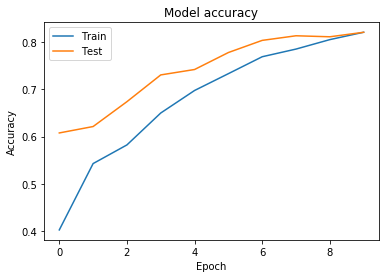

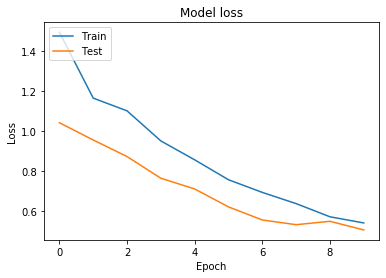

In [11]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

To evaluate a model, there are many methods are proposed to evaluate the model. I use Accuracy to evaluate the performance of my model.

In [12]:
test_images,test_labels = get_images('./adrian/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

94/94 [==============================] - 433s 5s/step - loss: 0.5006 - accuracy: 0.8267


[0.5005620718002319, 0.8266666531562805]

Lets predict the images from the "pred" folder.

In [13]:
pred_images,no_labels = get_images('./adrian/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

Following image shows the predicted class label on top of the image and probabilities below of the image.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


C:\Users\Mr. Capable\anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


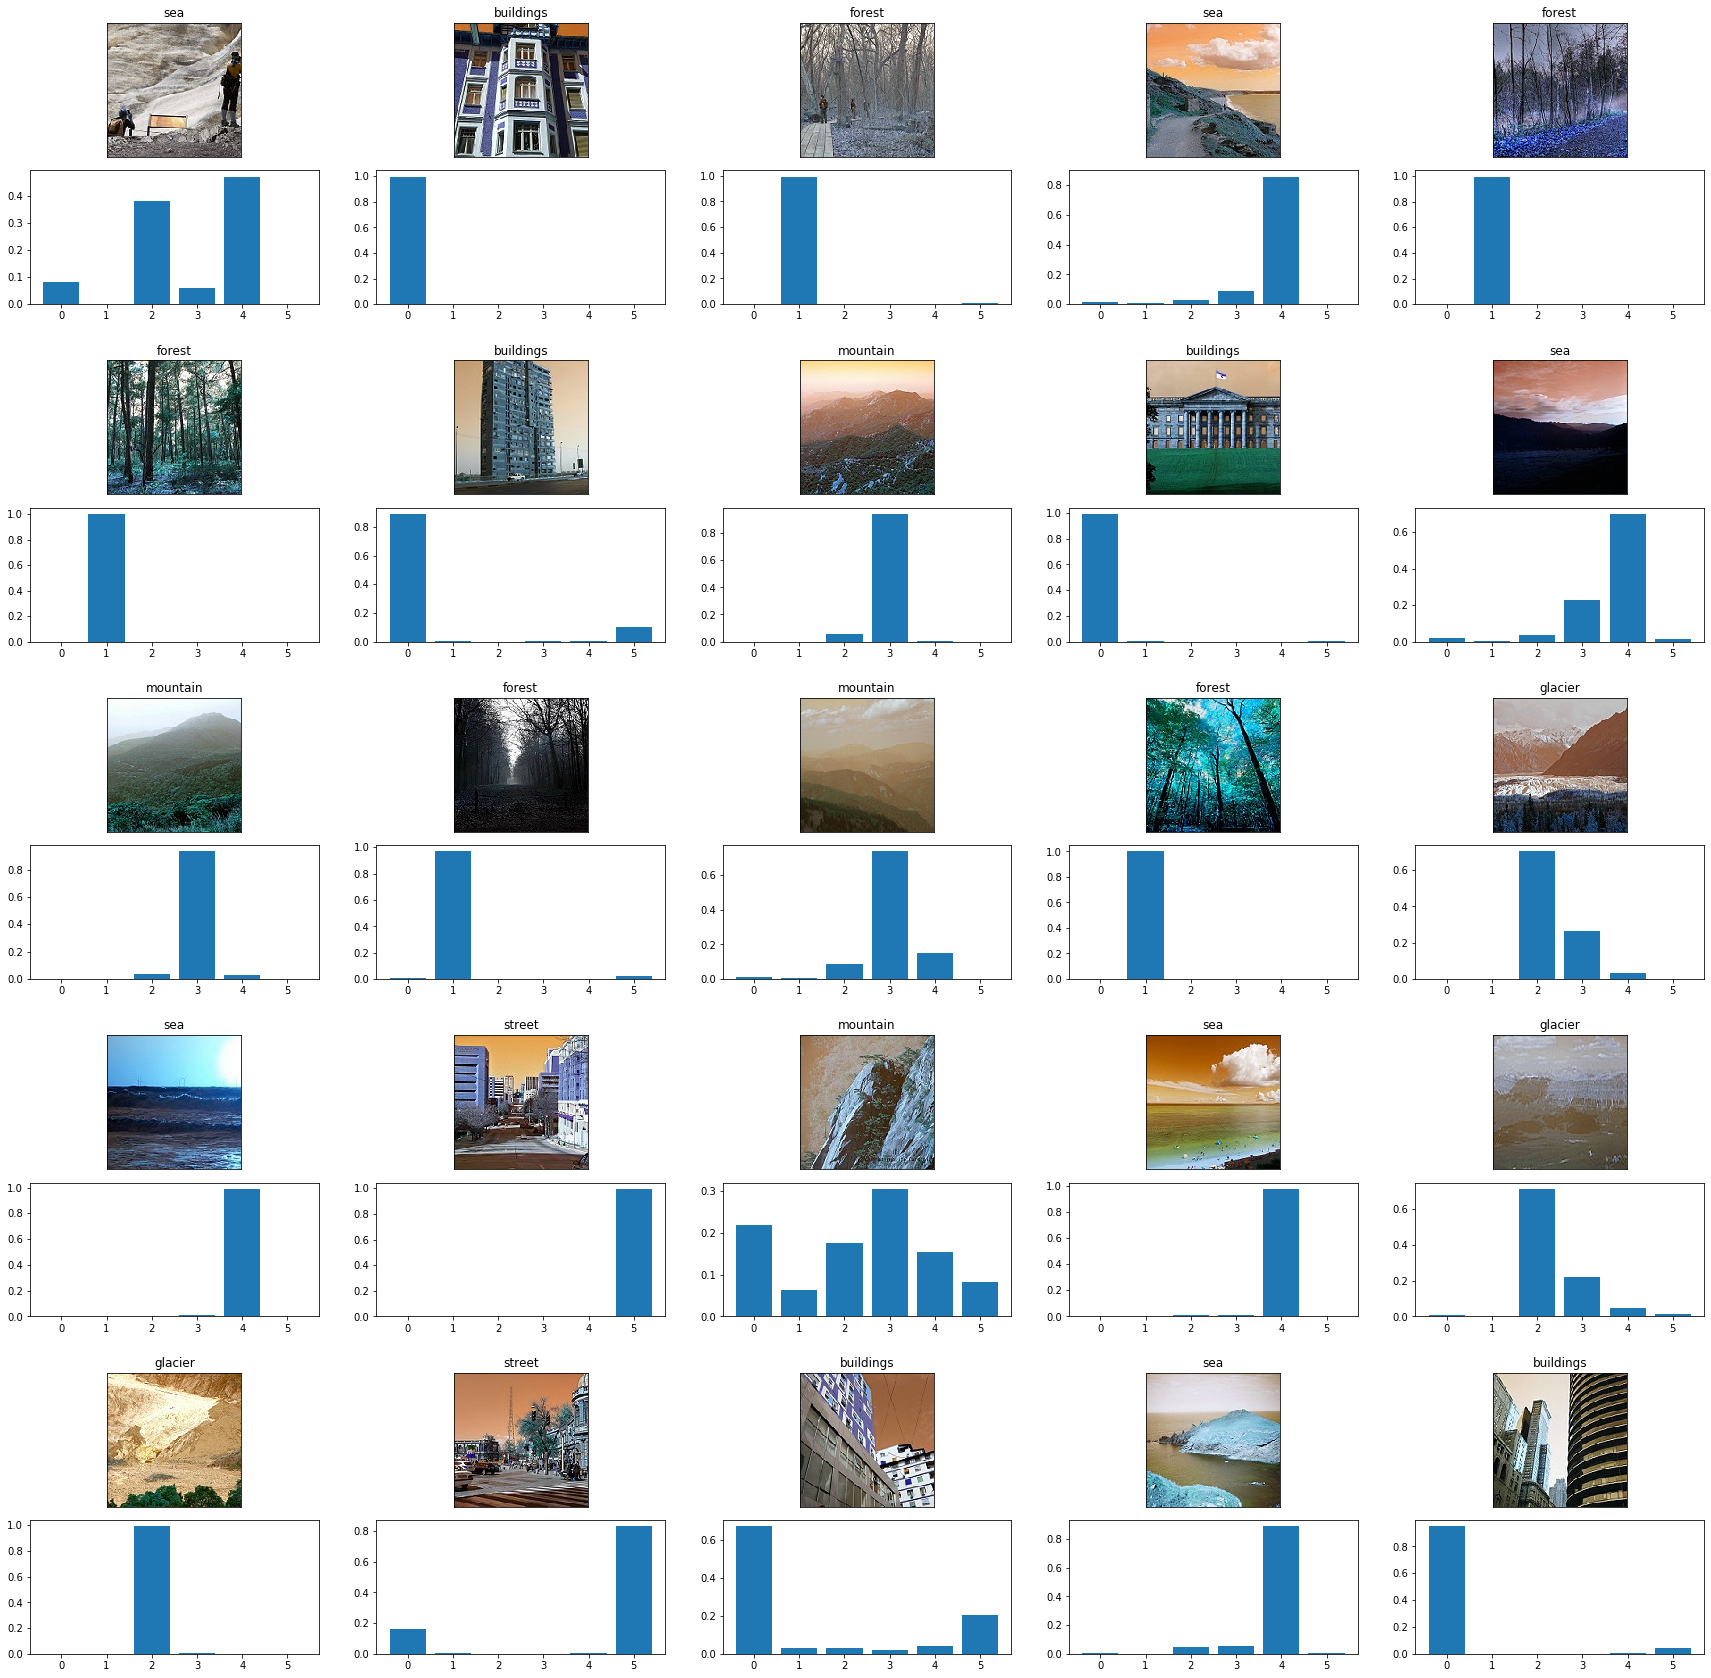

In [14]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()